## Analysis of New York City Jobs

In [ ]:
# This dataset contains current job postings available on the City of
# New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml).
# Internal postings available to city employees 
# and external postings available to the general public are included.

In [ ]:
'''
Execute the folowing instructions in Anaconnda prompt, f is required
conda install plotly
python -m pip install geopy
conda install -c conda-forge palettable
conda install -c https://conda.anaconda.org/plotly plotly
conda install -c conda-forge folium
'''

'''
run the command within the Jupyter Notebook"
!pip install plotly_express
'''

In [ ]:
## Importing packages

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set

import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly_express as px
import plotly.graph_objs as go # to make plots with tags Awesome package :D
import palettable
init_notebook_mode(connected=True)  
plt.style.use('ggplot')
from geopy.geocoders import Nominatim

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
#import geopandas as gpd
#from branca.colormap import LinearColormap
import plotly.figure_factory as ff

In [20]:
# Read CSV file
location ='C:/Data/daBootcamp/dataSets/nycJOBS.csv'
df= pd.read_csv(location, encoding='ISO-8859-1')
df.head(2)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-16T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-16T00:00:00.000


In [21]:
# Identifying number of columns and rows
df.shape

(3096, 28)

In [22]:
# Identifying missing values
df.count().sort_values()

Recruitment Contact                 0
Post Until                        864
Hours/Shift                       956
Work Location 1                  1363
Additional Information           1933
Preferred Skills                 2712
Full-Time/Part-Time indicator    2843
Minimum Qual Requirements        3084
Job Category                     3094
To Apply                         3095
Job ID                           3096
Posting Date                     3096
Residency Requirement            3096
Job Description                  3096
Work Location                    3096
Posting Updated                  3096
Salary Frequency                 3096
Salary Range To                  3096
Salary Range From                3096
Level                            3096
Title Code No                    3096
Civil Service Title              3096
Business Title                   3096
# Of Positions                   3096
Posting Type                     3096
Agency                           3096
Division/Wor

In [23]:
# Dropping columns are not required in the Analysis
df.drop(['Job ID','Level','Job Description','Minimum Qual Requirements','Preferred Skills',
        'Additional Information','To Apply','Hours/Shift','Recruitment Contact',
        'Work Location 1','Residency Requirement','Process Date', 'Post Until',
        'Civil Service Title','Posting Updated'],
        axis=1, inplace= True)



### Renaming some colums


In [24]:
#Rename some colums
df= df.rename(columns={'Posting Type': 'PostingType', '# Of Positions': 'NoPositions',
                       'Business Title': 'BusinessTitle','Title Code No': 'TitleCode',
                       'Job Category':'JobCategory','Full-Time/Part-Time indicator':'FullTime/PartTime',
                       'Salary Range From':'SalaryFrom','Salary Range To':'SalaryTo',
                       'Salary Frequency':'SalaryFrecuency', 'Work Location':'WorkLocation',
                       'Division/Work Unit':'Division','Posting Date':'PostingDate'}
             )

In [52]:
df.head(4)

,Agency,PostingType,NoPositions,BusinessTitle,TitleCode,JobCategory,FullTime/PartTime,SalaryFrom,SalaryTo,SalaryFrecuency,WorkLocation,Division,PostingDate
0,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,40563,NaN,Undefined,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,2011-06-24T00:00:00.000
1,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",10009,NaN,Full time,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,2012-01-26T00:00:00.000
2,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,90698,Maintenance & Operations,Full time,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000
3,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,90698,Maintenance & Operations,Full time,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000


In [8]:
#Identifying missing values
# As we see I have still have null values for FullTime/PartTime
df.isnull().sum()
#df.info()

Agency                 0
PostingType            0
NoPositions            0
BusinessTitle          0
TitleCode              0
JobCategory            2
FullTime/PartTime    253
SalaryFrom             0
SalaryTo               0
SalaryFrecuency        0
WorkLocation           0
Division               0
PostingDate            0
dtype: int64

### Replacing values

In [45]:


df.loc[:, 'FullTime/PartTime'].replace(['F'], ['Full time'], inplace=True)
df.loc[:, 'FullTime/PartTime'].replace(['P'], ['Part time'], inplace=True)


## Data visualization

In [46]:
# Fill NA values with a value more meaningful
                             
df['FullTime/PartTime'].fillna('Undefined', inplace=True)
valueCounts=df['FullTime/PartTime'].value_counts()
valueCounts


Full time    2698
Undefined     253
Part time     145
Name: FullTime/PartTime, dtype: int64

### Styled pie chart: Full time or Part time job?
#### # URL reference: https://plot.ly/python/pie-charts/   

In [48]:

colors = ['pink', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=valueCounts)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### Pie plot: Full time or Part time job?

In [ ]:
labels=valueCounts.index.tolist()
fig = go.Figure(data=[go.Pie(labels=labels, values=valueCounts)])
fig.show()

### Bar chat with hover text

In [66]:
countType={}
countType= df.groupby('PostingType').size()
print(countType)


PostingType
External    1349
Internal    1747
dtype: int64


In [70]:
print(countType['External'])
print(countType['Internal'])


1349
1747


In [72]:
import plotly.graph_objects as go

x = ['Internal', 'External']
y = [countType['External'], countType['Internal']]



# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=[int(countType['External']), int(countType['Internal']) ])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Two kinds of position: Internal, External')
fig.show()

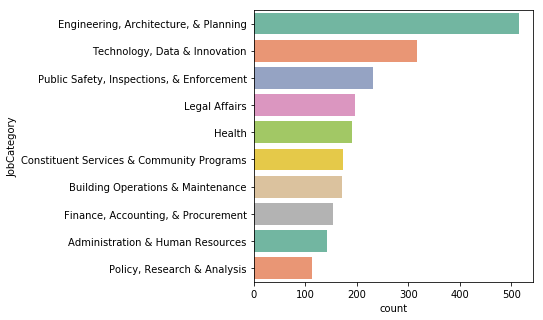

In [6]:
# Get Top 10 popular Job Categories
plt.figure(figsize=(5,5))
plot=sns.countplot(y='JobCategory', data=df, order= df['JobCategory'].value_counts().iloc[:10].index
                  , palette='Set2')

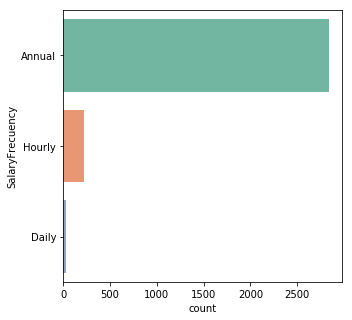

In [19]:
# Get more popular Salary Freccuency
plt.figure(figsize=(5,5))
plot=sns.countplot(y='SalaryFrecuency', data=df, palette='Set2')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 13 columns):
Agency               3096 non-null object
PostingType          3096 non-null object
NoPositions          3096 non-null int64
BusinessTitle        3096 non-null object
TitleCode            3096 non-null object
JobCategory          3094 non-null object
FullTime/PartTime    2843 non-null object
SalaryFrom           3096 non-null float64
SalaryTo             3096 non-null float64
SalaryFrecuency      3096 non-null object
WorkLocation         3096 non-null object
Division             3096 non-null object
PostingDate          3096 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 314.5+ KB
